In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

mktcap 1_000_000 MA 기준으로 스크리닝

In [2]:
raw_mktcap = pd.read_pickle("ryu_new_mktcap2.pickle")

In [4]:
# MA로 필터링
mktcap_moving_average = raw_mktcap.rolling(20, min_periods=1).mean()
clean_mktcap = raw_mktcap[mktcap_moving_average>1_000_000]

In [5]:
# Sample 코인 (BTC:2013-04-29, XRP:2013-08-05, ETH:2015-08-08)
sample = clean_mktcap[["BTC"]]
sample.loc[sample.isna().values]

,BTC
2011-01-01,NaN
2011-01-02,NaN
2011-01-03,NaN
2011-01-04,NaN
2011-01-05,NaN
...,...
2013-04-23,NaN
2013-04-24,NaN
2013-04-25,NaN
2013-04-26,NaN


In [10]:
# 2013년 4월 27일까지는 universe에 편입된 코인이 존재하지 않는다
## 이 내용은 Papar와 동일하다 -> BTC의 Marketcap을 1로 fill 해주자
clean_mktcap.count(1).loc[clean_mktcap.count(1) == 0]

2011-01-01    0
2011-01-02    0
2011-01-03    0
2011-01-04    0
2011-01-05    0
             ..
2013-04-23    0
2013-04-24    0
2013-04-25    0
2013-04-26    0
2013-04-27    0
Length: 848, dtype: int64

In [12]:
# 1로 넣어주는 과정
clean_mktcap.loc[:"2013-04-27", "BTC"]= 1

# 변경된 값 확인
clean_mktcap.loc[:"2013-04-28", ["BTC"]]

,BTC
2011-01-01,1.000000e+00
2011-01-02,1.000000e+00
2011-01-03,1.000000e+00
2011-01-04,1.000000e+00
2011-01-05,1.000000e+00
...,...
2013-04-24,1.000000e+00
2013-04-25,1.000000e+00
2013-04-26,1.000000e+00
2013-04-27,1.000000e+00


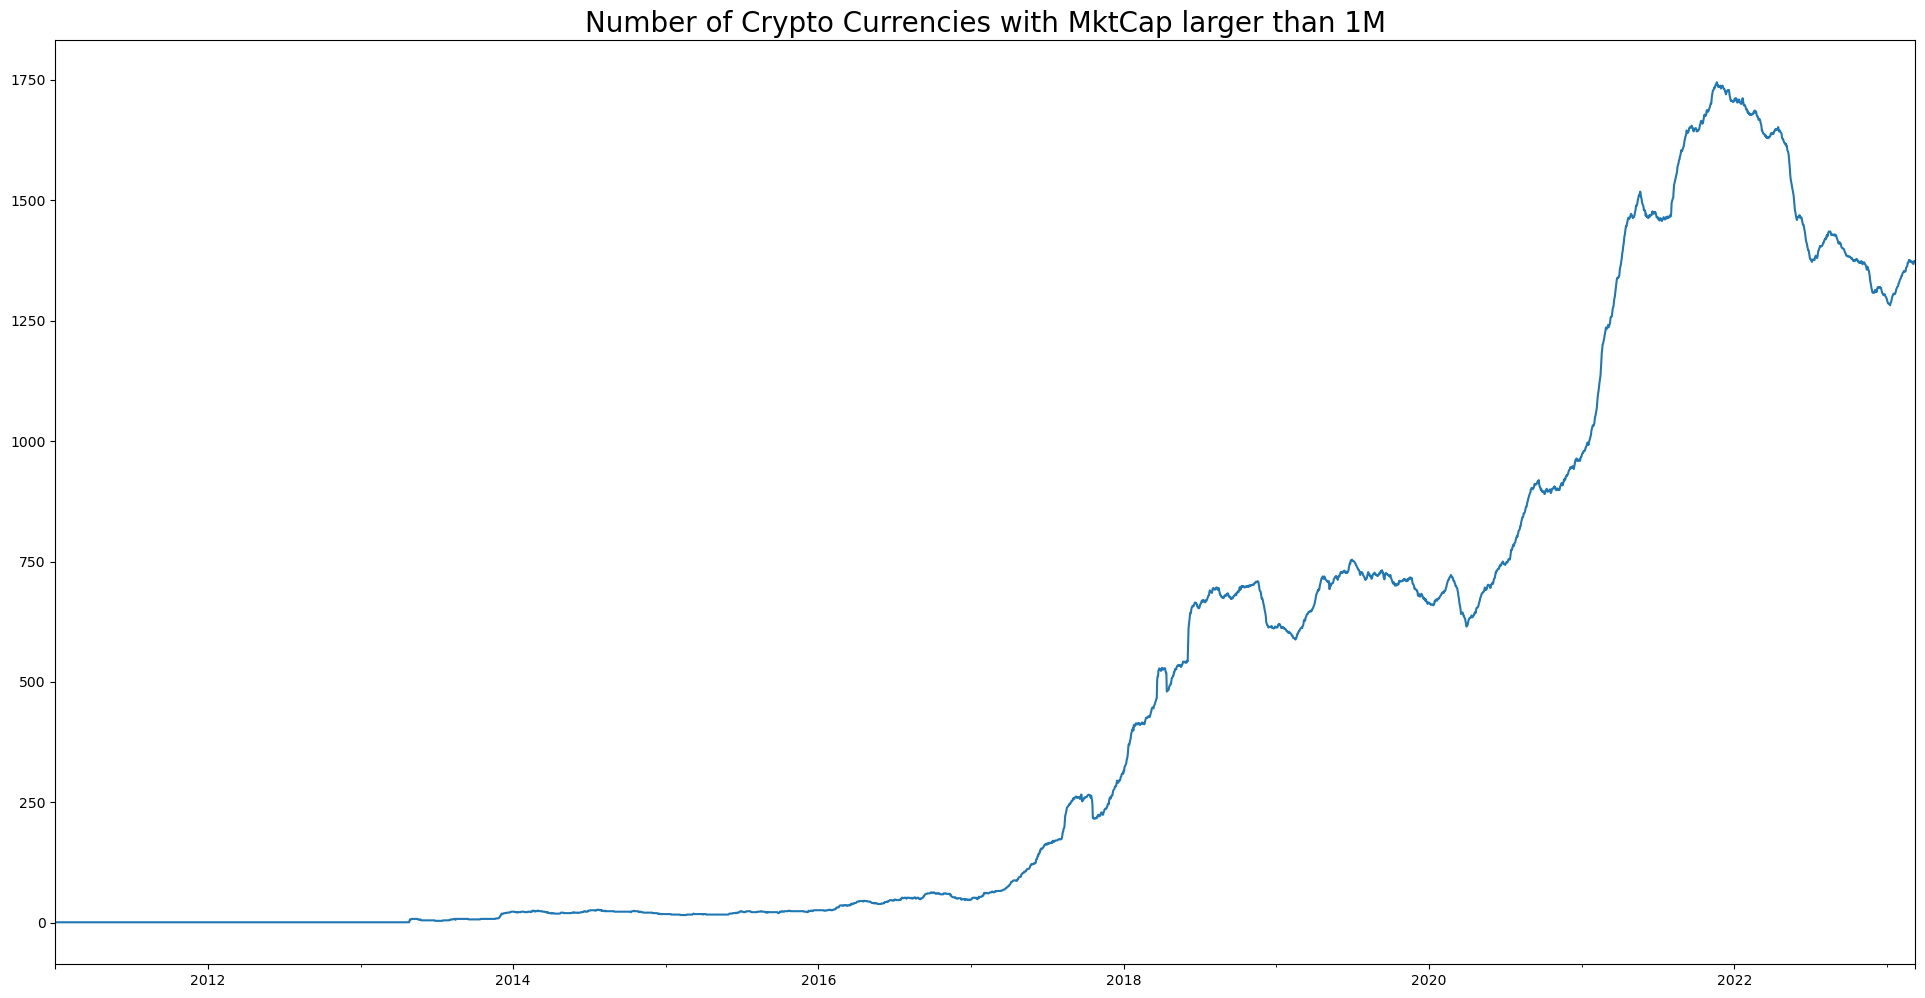

In [13]:
plt.figure()
plt.title("Number of Crypto Currencies with MktCap larger than 1M", size=20)
clean_mktcap.count(1).plot(figsize=(24,12));

In [ ]:
# 저장
clean_mktcap.to_pickle("ryu_new_mktcap2.pickle")

갑자기 2013년 4월 28일 BTC는 어떻게 되었나 궁금

In [5]:
clean_mktcap = pd.read_pickle("ryu_new_mktcap2.pickle")

In [7]:
clean_mktcap.loc["2013-04-25":"2013-04-29", "BTC"]

2013-04-25    1.000000e+00
2013-04-26    1.000000e+00
2013-04-27    1.000000e+00
2013-04-28    1.483339e+09
2013-04-29    1.549501e+09
Name: BTC, dtype: float64